# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Febrian Valentino Agape
- **Email:** febrian.valentino1402@gmail.com
- **ID Dicoding:** febrian_valentino_agape_XmPS

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan ?
- Apakah ada hubungan antara frekuensi penyewaan dan kepuasan pelanggan?

## Import Semua Packages/Library yang Digunakan

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Wrangling

## Gathering Data

### Load Data

In [25]:
hour = pd.read_csv('/content/hour.csv')
day = pd.read_csv('/content/day.csv')

## Assessing Data

Penilaian seluruh tabel dalam dataset

### Mengecek masing-masing data tiap tabel untuk memahami struktur tipe data nya


In [26]:
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [27]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [28]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [29]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Memeriksa untuk apakah terdapat missing value atau data kosong

In [30]:
hour_missing = hour.isnull().sum()
day_missing = day.isnull().sum()

print("\nMissing values in Hour Dataset:")
print(hour_missing[hour_missing > 0])
print("\nMissing values in Day Dataset:")
print(day_missing[day_missing > 0])


Missing values in Hour Dataset:
Series([], dtype: int64)

Missing values in Day Dataset:
Series([], dtype: int64)


Output tersebut menunjukkan bahwa tidak ada nilai yang hilang (missing values) di kedua dataset (hour.csv dan day.csv). Ini berarti bahwa setiap kolom dalam dataset tersebut memiliki data lengkap atau nilai yang hilang.

###Mengecek apakah terdapat duplikasi data

In [31]:
day.duplicated().sum()

0

In [32]:
hour.duplicated().sum()

0

Berdasarkan hasil pemeriksaan dapat disimpulkan bahwa tidak terdapat data yang kosong

###Mengecek parameter tiap statistik

In [33]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Dapat dilihat pada kode sebelumnya bahwa terdapat beberapa kesalahan tipe data. Pada tabel yang mengandung nilai dengan tipe data **date** tapi malah berupa **object**

In [34]:
hour['dteday'] = pd.to_datetime(hour['dteday'])
day['dteday'] = pd.to_datetime(day['dteday'])

Setelah merubah objek data dilanjutkan dengan merubah notasi angka pada tiap kolom menjadi isi sebenarnya

In [35]:
hour['yr'] = hour['yr'].map({
    0: '2011', 1: '2012'
})
day['mnth'] = day['mnth'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
day['season'] = day['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
day['weekday'] = day['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
day['weathersit'] = day['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

In [36]:
hour['yr'] = hour['yr'].map({
    0: '2011', 1: '2012'
})
hour['mnth'] = hour['mnth'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
hour['season'] = hour['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
hour['weekday'] = hour['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
hour['weathersit'] = hour['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

###Mengubah data menjadi kategorikal

In [37]:
day['season'] = day.season.astype('category')
day['yr'] = day.yr.astype('category')
day['mnth'] = day.mnth.astype('category')
day['holiday'] = day.holiday.astype('category')
day['weekday'] = day.weekday.astype('category')
day['workingday'] = day.workingday.astype('category')
day['weathersit'] = day.weathersit.astype('category')

day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,Jan,0,Sun,0,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,Jan,0,Mon,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,Jan,0,Tue,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,Jan,0,Wed,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [38]:
hour['season'] = hour.season.astype('category')
hour['yr'] = hour.yr.astype('category')
hour['mnth'] = hour.mnth.astype('category')
hour['holiday'] = hour.holiday.astype('category')
hour['weekday'] = hour.weekday.astype('category')
hour['workingday'] = hour.workingday.astype('category')
hour['weathersit'] = hour.weathersit.astype('category')

hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,NaN,Jan,0,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,NaN,Jan,1,0,Sat,0,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,NaN,Jan,2,0,Sat,0,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,NaN,Jan,3,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,NaN,Jan,4,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,0,1,1


In [39]:
hour['total_users'] = hour['casual'] + hour['registered']

## Exploratory Data Analysis (EDA)

###Grouping penyewaan motor (casual dan register) by tahun  (2011 & 2012)



In [40]:
trend_bike = hour.groupby(by='yr').agg({
    'cnt': 'mean'
})

trend_bike.head()

<ipython-input-40-c21c05143f20>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trend_bike = hour.groupby(by='yr').agg({


,cnt
yr,


###Grouping penyewaan motor (casual dan register) by bulan/mnth

In [41]:
trend_bike = hour.groupby(by='mnth').agg({
    'cnt': 'mean'
})

trend_bike.head()

<ipython-input-41-1e4287354d91>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trend_bike = hour.groupby(by='mnth').agg({


,cnt
mnth,
Apr,187.260960
Aug,238.097627
Dec,142.303439
Feb,112.865026
Jan,94.424773


###Grouping penyewa motor (casual dan register) by season

In [42]:
seasonn = day.groupby('season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'cnt': ['max', 'min', 'mean']
}).reindex (['Spring', 'Summer', 'Fall', 'Winter',])
seasonn.columns = ['casual_mean', 'registered_mean', 'cnt_max', 'cnt_min', 'cnt_mean']
seasonn.head()

<ipython-input-42-aa95fa2f6211>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonn = day.groupby('season').agg({


,casual_mean,registered_mean,cnt_max,cnt_min,cnt_mean
season,,,,,
Spring,334.928177,2269.204420,7836,431,2604.132597
Summer,1106.097826,3886.233696,8362,795,4992.331522
Fall,1202.611702,4441.691489,8714,1115,5644.303191
Winter,729.112360,3999.050562,8555,22,4728.162921


###Grouping penyewa motor by weather (cuaca)

In [43]:
day.groupby(by='weathersit').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

<ipython-input-43-8f09f4cffbf5>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day.groupby(by='weathersit').agg({


cnt                           
                      max  min         mean      sum
weathersit                                          
Clear/Partly Cloudy  8714  431  4876.786177  2257952
Light Snow/Rain      4639   22  1803.285714    37869
Misty/Cloudy         8362  605  4035.862348   996858

In [44]:
monthly_rentals = hour.groupby(hour['dteday'].dt.to_period('M'))['cnt'].sum().reset_index()
monthly_rentals.columns = ['Month', 'Total Rentals']
monthly_rentals.head()


,Month,Total Rentals
0,2011-01,38189
1,2011-02,48215
2,2011-03,64045
3,2011-04,94870
4,2011-05,135821


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh season atau musim pada penyewaan sepeda?

<Figure size 1000x600 with 0 Axes>

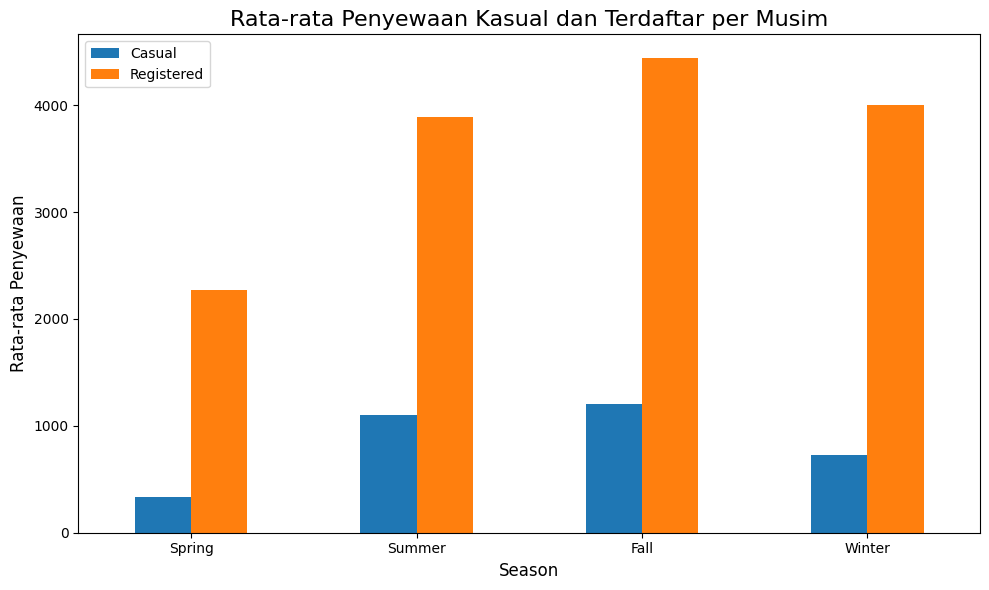

In [45]:
plt.figure(figsize=(10, 6))
seasonn[['casual_mean', 'registered_mean']].plot(kind='bar', figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])

plt.title('Rata-rata Penyewaan Kasual dan Terdaftar per Musim', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Rata-rata Penyewaan', fontsize=12)
plt.xticks(rotation=0)
plt.legend(['Casual', 'Registered'], loc='upper left')

plt.tight_layout()
plt.show()

### Pertanyaan 2:Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan ?

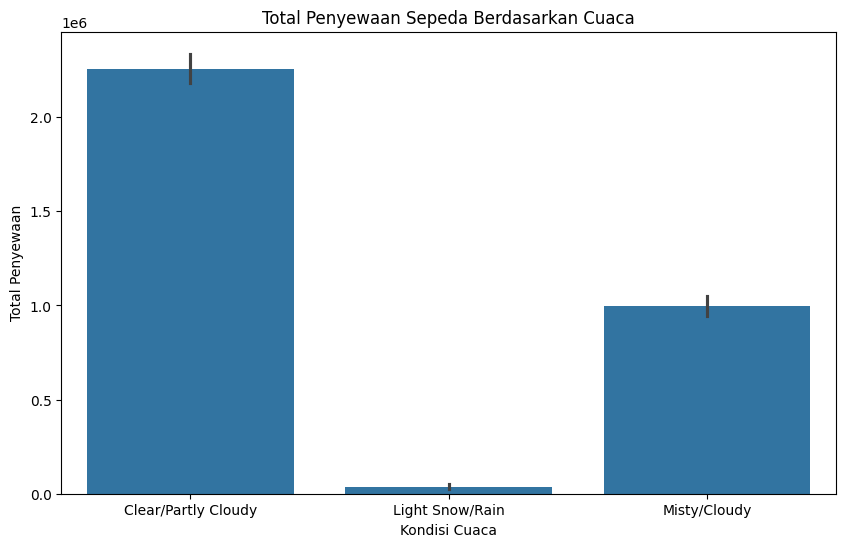

In [46]:
plt.figure(figsize=(10, 6))
sns.barplot(data=day, x='weathersit', y='cnt', estimator=sum)
plt.title('Total Penyewaan Sepeda Berdasarkan Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Total Penyewaan')
plt.show()

cuaca cerah/berawan sebagian Memiliki jumlah penyewaan sepeda tertinggi, menunjukkan bahwa orang lebih cenderung menyewa sepeda saat cuaca cerah atau berawan sebagian. cuaca berkabut/berawan menempati posisi kedua dalam jumlah penyewaan sepeda, meskipun lebih rendah dibandingkan cuaca cerah. pada hujan ringan/salju ringan Jumlah penyewaan sepeda menurun signifikan saat cuaca hujan ringan atau salju ringan. Cuaca Ekstrem memiliki jumlah penyewaan sepeda terendah, menunjukkan bahwa kondisi cuaca ekstrem sangat mengurangi minat orang untuk menyewa sepeda.

## Conclusion

- Conclution pertanyaan 1: Musim memiliki pengaruh signifikan terhadap penyewaan sepeda baik untuk penyewaan kasual maupun terdaftar. Pada musim panas, penyewaan sepeda mencapai puncaknya untuk kedua metode, dengan penyewaan registered sedikit lebih tinggi dibandingkan penyewaan kasual. Musim gugur menunjukkan sedikit penurunan dari musim panas tetapi tetap tinggi untuk kedua metode. Pada musim semi, penyewaan registered tetap cukup tinggi, sementara penyewaan kasual lebih rendah. Musim dingin menunjukkan penurunan drastis dalam penyewaan untuk kedua metode, dengan penyewaan kasual turun lebih tajam dibandingkan penyewaan registered.Secara keseluruhan, penyewaan sepeda lebih tinggi pada musim panas dan gugur, dan lebih rendah pada musim dingin, dengan penyewaan registered cenderung lebih stabil dibandingkan penyewaan kasual sepanjang tahun. Ini menunjukkan bahwa cuaca yang lebih hangat dan nyaman mendorong lebih banyak orang untuk menyewa sepeda, sementara cuaca dingin mengurangi minat penyewaan sepeda.

- Conclution pertanyaan 2: Berdasarkan hasil visualisasi, jumlah penyewaan sepeda tertinggi terjadi saat cuaca cerah atau berawan sebagian, menunjukkan bahwa orang lebih cenderung menyewa sepeda dalam kondisi cuaca tersebut. Cuaca berkabut atau berawan menempati posisi kedua dalam jumlah penyewaan sepeda, meskipun lebih rendah dibandingkan cuaca cerah. Sementara itu, jumlah penyewaan sepeda menurun signifikan saat cuaca hujan ringan atau salju ringan.